In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv("../data/Social_Network_Ads.csv")
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [4]:
X = data.drop("Purchased",axis=1)
y = data["Purchased"]

In [5]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [7]:
corr = data.corr() # Correlation Matrix
corr.style.background_gradient(cmap='coolwarm')

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


Text(0, 0.5, 'Salary')

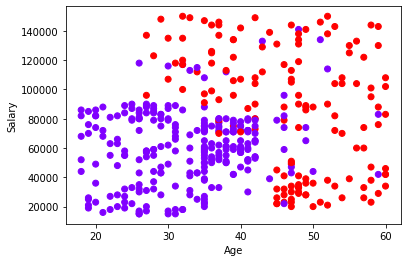

In [8]:
plt.scatter(X["Age"],X["EstimatedSalary"],c=y,cmap="rainbow")
plt.xlabel("Age")
plt.ylabel("Salary")

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [11]:
X_train = pd.DataFrame(scaler.transform(X_train),columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns=X.columns)

In [12]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [13]:
log.score(X_train,y_train)

0.821875

In [14]:
log.score(X_test,y_test) # 92.5% 7.5%  80 -> 74 ถูก 6 ผิด

0.925

In [27]:
log.predict(scaler.transform([[49,35000]]))

array([1])

In [18]:
y_pred = log.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test,y_preds)
cf_matrix

array([[57,  1],
       [ 5, 17]])

<AxesSubplot:>

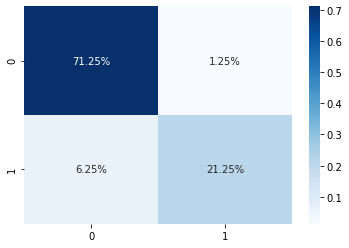

In [26]:
import seaborn as sns

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [41]:
log.predict(scaler.transform([[35,130000]]))

array([1])

Text(0, 0.5, 'Salary')

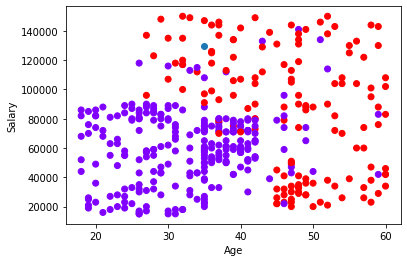

In [42]:
plt.scatter(X["Age"],X["EstimatedSalary"],c=y,cmap="rainbow")
plt.scatter(35,130000)
plt.xlabel("Age")
plt.ylabel("Salary")

In [ ]:
# from matplotlib.colors import ListedColormap
# X_set, y_set = scaler.inverse_transform(X_train_scaled), y_train
# X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
#                      np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
# plt.contourf(X1, X2, log.predict(scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
#              alpha = 0.75, cmap = ListedColormap(('red', 'green')))
# plt.xlim(X1.min(), X1.max())
# plt.ylim(X2.min(), X2.max())
# for i, j in enumerate(np.unique(y_set)):
#     plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
# plt.title('Logistic Regression (Training set)')
# plt.xlabel('Age')
# plt.ylabel('Estimated Salary')
# plt.legend()
# plt.show()